# HMM Data Preprocessing

This notebook loads the corpus, analyzes word length distribution, normalizes words, and prepares data for HMM training.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# Load corpus
corpus_path = '/Users/hafizmohammedaahil/Documents/University-Related-Stuff/SEM-5/Hackathons/ML-Hackathon/Data/corpus.txt'

with open(corpus_path, 'r', encoding='utf-8') as f:
    words = [line.strip().lower() for line in f if line.strip()]

print(f"Total words loaded: {len(words)}")
print(f"Sample words: {words[:10]}")


Total words loaded: 50000
Sample words: ['suburbanize', 'asmack', 'hypotypic', 'promoderationist', 'consonantly', 'philatelically', 'cacomelia', 'thicklips', 'luciferase', 'cinematography']


In [3]:
# Normalize words: ensure only lowercase letters
def normalize_word(word):
    """Normalize word to contain only lowercase letters"""
    return ''.join(c for c in word.lower() if c.isalpha())

normalized_words = [normalize_word(word) for word in words]

# Filter out empty words (shouldn't happen, but safety check)
normalized_words = [w for w in normalized_words if len(w) > 0]

print(f"Words after normalization: {len(normalized_words)}")
print(f"Sample normalized words: {normalized_words[:10]}")

# Check if any words were modified
modified_count = sum(1 for orig, norm in zip(words, normalized_words) if orig != norm)
print(f"Words that were modified during normalization: {modified_count}")


Words after normalization: 50000
Sample normalized words: ['suburbanize', 'asmack', 'hypotypic', 'promoderationist', 'consonantly', 'philatelically', 'cacomelia', 'thicklips', 'luciferase', 'cinematography']
Words that were modified during normalization: 21


In [4]:
# Analyze word length distribution
word_lengths = [len(word) for word in normalized_words]
length_counter = Counter(word_lengths)

print("Word Length Distribution:")
print(f"Min length: {min(word_lengths)}")
print(f"Max length: {max(word_lengths)}")
print(f"Mean length: {np.mean(word_lengths):.2f}")
print(f"Median length: {np.median(word_lengths):.2f}")
print(f"Std deviation: {np.std(word_lengths):.2f}")

print("\nTop 10 most common lengths:")
for length, count in length_counter.most_common(10):
    print(f"  Length {length}: {count} words ({count/len(normalized_words)*100:.2f}%)")


Word Length Distribution:
Min length: 1
Max length: 24
Mean length: 9.50
Median length: 9.00
Std deviation: 2.96

Top 10 most common lengths:
  Length 9: 6787 words (13.57%)
  Length 10: 6465 words (12.93%)
  Length 8: 6369 words (12.74%)
  Length 11: 5452 words (10.90%)
  Length 7: 5111 words (10.22%)
  Length 12: 4292 words (8.58%)
  Length 6: 3755 words (7.51%)
  Length 13: 3094 words (6.19%)
  Length 5: 2340 words (4.68%)
  Length 14: 2019 words (4.04%)


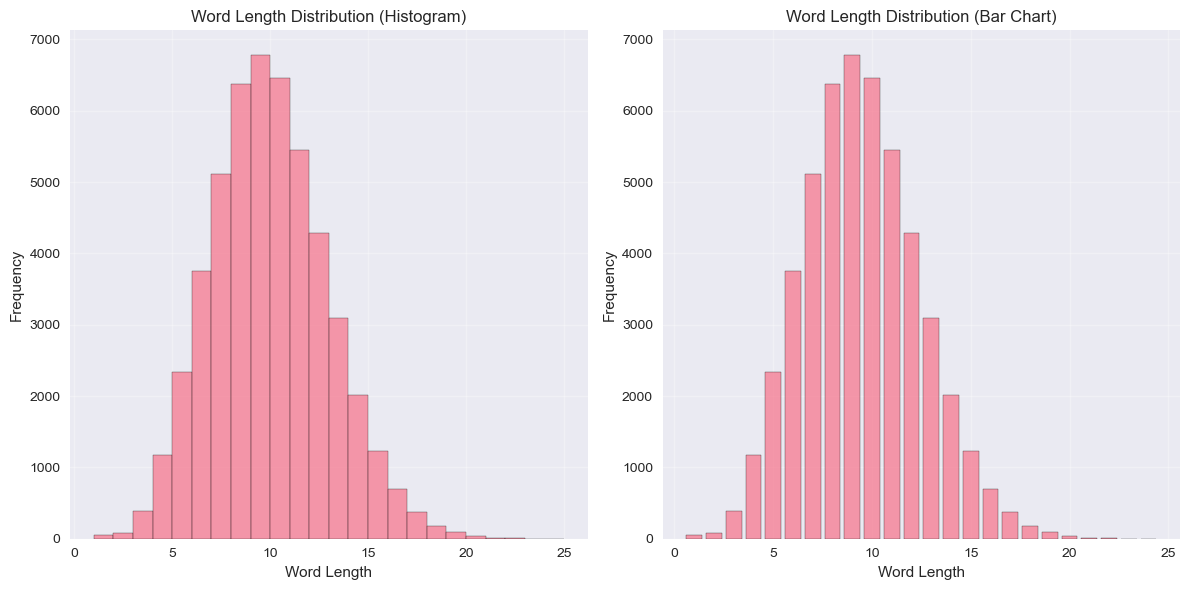

In [5]:
# Visualize word length distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(word_lengths, bins=range(min(word_lengths), max(word_lengths)+2), edgecolor='black', alpha=0.7)
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Distribution (Histogram)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sorted_lengths = sorted(length_counter.items())
lengths = [x[0] for x in sorted_lengths]
counts = [x[1] for x in sorted_lengths]
plt.bar(lengths, counts, edgecolor='black', alpha=0.7)
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Distribution (Bar Chart)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/word_length_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


In [6]:
# Create vocabulary and character mappings
all_chars = set()
for word in normalized_words:
    all_chars.update(word)

# Create alphabet (26 letters a-z)
alphabet = sorted(list(string.ascii_lowercase))
char_to_idx = {char: idx for idx, char in enumerate(alphabet)}
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

print(f"Total unique characters in corpus: {len(all_chars)}")
print(f"Characters used: {sorted(all_chars)}")
print(f"Character to index mapping: {char_to_idx}")

# Verify all characters are in alphabet
non_alpha_chars = all_chars - set(alphabet)
if non_alpha_chars:
    print(f"WARNING: Non-alphabetic characters found: {non_alpha_chars}")
else:
    print("✓ All characters are alphabetic")


Total unique characters in corpus: 26
Characters used: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Character to index mapping: {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
✓ All characters are alphabetic


Top 10 most common characters:
  e: 49224 occurrences (10.37%)
  a: 42110 occurrences (8.87%)
  i: 42068 occurrences (8.86%)
  o: 35829 occurrences (7.55%)
  r: 33619 occurrences (7.08%)
  n: 33314 occurrences (7.02%)
  t: 32191 occurrences (6.78%)
  s: 29044 occurrences (6.12%)
  l: 27406 occurrences (5.77%)
  c: 21718 occurrences (4.57%)


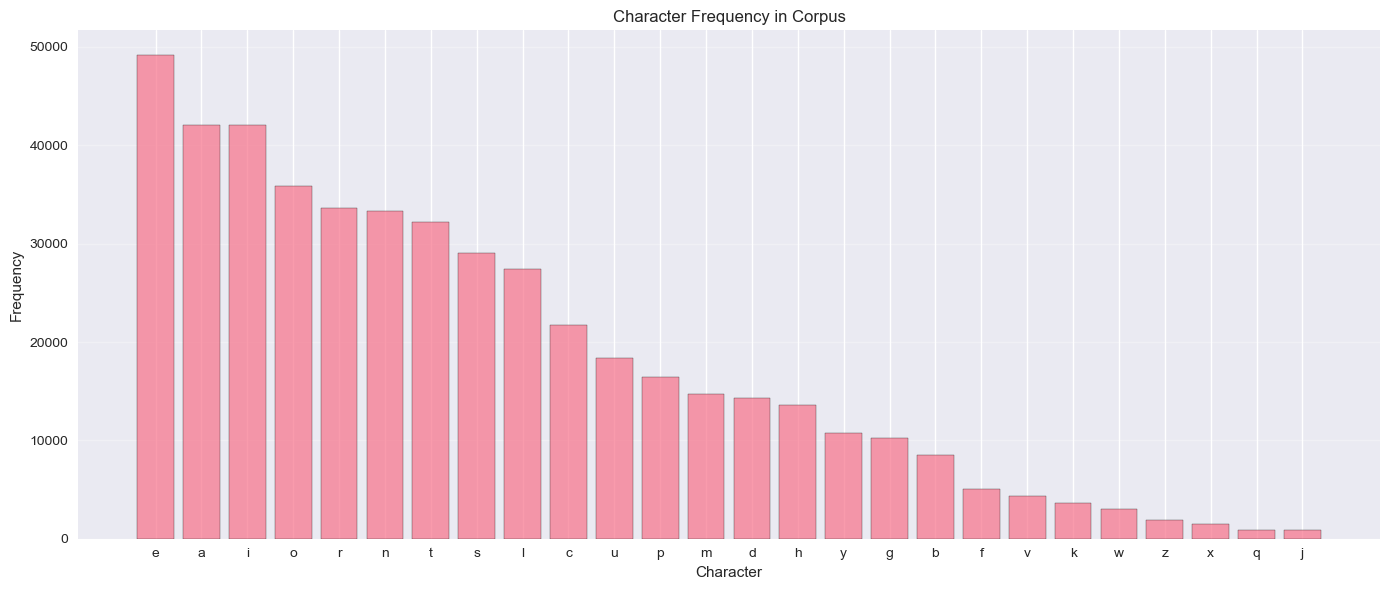

In [7]:
# Analyze character frequency
char_freq = Counter()
for word in normalized_words:
    char_freq.update(word)

print("Top 10 most common characters:")
for char, freq in char_freq.most_common(10):
    print(f"  {char}: {freq} occurrences ({freq/sum(char_freq.values())*100:.2f}%)")

# Visualize character frequency
plt.figure(figsize=(14, 6))
chars = [char for char, _ in char_freq.most_common()]
freqs = [freq for _, freq in char_freq.most_common()]
plt.bar(chars, freqs, edgecolor='black', alpha=0.7)
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.title('Character Frequency in Corpus')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../results/character_frequency.png', dpi=150, bbox_inches='tight')
plt.show()


In [8]:
# Group words by length for potential separate HMM training
words_by_length = {}
for word in normalized_words:
    length = len(word)
    if length not in words_by_length:
        words_by_length[length] = []
    words_by_length[length].append(word)

print("Words grouped by length:")
for length in sorted(words_by_length.keys()):
    print(f"  Length {length}: {len(words_by_length[length])} words")

# Save important data structures
import pickle
import os

# Create results directory if it doesn't exist
os.makedirs('../results', exist_ok=True)

# Save preprocessed data
preprocessed_data = {
    'words': normalized_words,
    'words_by_length': words_by_length,
    'char_to_idx': char_to_idx,
    'idx_to_char': idx_to_char,
    'alphabet': alphabet,
    'word_lengths': word_lengths,
    'char_freq': dict(char_freq),
    'length_counter': dict(length_counter)
}

with open('../results/preprocessed_data.pkl', 'wb') as f:
    pickle.dump(preprocessed_data, f)

print("\n✓ Preprocessed data saved to '../results/preprocessed_data.pkl'")
print(f"✓ Total words processed: {len(normalized_words)}")


Words grouped by length:
  Length 1: 46 words
  Length 2: 84 words
  Length 3: 388 words
  Length 4: 1169 words
  Length 5: 2340 words
  Length 6: 3755 words
  Length 7: 5111 words
  Length 8: 6369 words
  Length 9: 6787 words
  Length 10: 6465 words
  Length 11: 5452 words
  Length 12: 4292 words
  Length 13: 3094 words
  Length 14: 2019 words
  Length 15: 1226 words
  Length 16: 698 words
  Length 17: 375 words
  Length 18: 174 words
  Length 19: 88 words
  Length 20: 40 words
  Length 21: 16 words
  Length 22: 8 words
  Length 23: 3 words
  Length 24: 1 words

✓ Preprocessed data saved to '../results/preprocessed_data.pkl'
✓ Total words processed: 50000


In [9]:
# Summary statistics
print("=" * 60)
print("PREPROCESSING SUMMARY")
print("=" * 60)
print(f"Total words: {len(normalized_words)}")
print(f"Unique word lengths: {len(set(word_lengths))}")
print(f"Length range: {min(word_lengths)} - {max(word_lengths)}")
print(f"Average length: {np.mean(word_lengths):.2f}")
print(f"Most common length: {max(length_counter.items(), key=lambda x: x[1])[0]}")
print(f"Characters used: {len(all_chars)}")
print("=" * 60)


PREPROCESSING SUMMARY
Total words: 50000
Unique word lengths: 24
Length range: 1 - 24
Average length: 9.50
Most common length: 9
Characters used: 26
